In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.sparse import csr_matrix

In [4]:
!pip install scikit-surprise


                                              0.0/154.4 kB ? eta -:--:--
     -------                               30.7/154.4 kB 660.6 kB/s eta 0:00:01
     -------                               30.7/154.4 kB 660.6 kB/s eta 0:00:01
     ---------                             41.0/154.4 kB 281.8 kB/s eta 0:00:01
     --------------                        61.4/154.4 kB 328.2 kB/s eta 0:00:01
     --------------                        61.4/154.4 kB 328.2 kB/s eta 0:00:01
     -------------------                   81.9/154.4 kB 286.7 kB/s eta 0:00:01
     ----------------------                92.2/154.4 kB 275.8 kB/s eta 0:00:01
     ----------------------                92.2/154.4 kB 275.8 kB/s eta 0:00:01
     ---------------------------------    143.4/154.4 kB 355.0 kB/s eta 0:00:01
     ------------------------------------ 154.4/154.4 kB 355.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: sti

In [5]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [8]:
df_songs = pd.read_csv(r'C:\Users\yamun\Downloads\music_recommender-master\music_recommender-master\collaborative_recommender_system\songs.csv')

In [9]:
df_songs.head()

,user_id,song_id,listen_count,title,artist_name
0,user_1,song_23,17,Title 23,Artist 13
1,user_1,song_26,4,Title 26,Artist 3
2,user_1,song_46,16,Title 46,Artist 12
3,user_1,song_30,3,Title 30,Artist 3
4,user_1,song_43,20,Title 43,Artist 13


In [10]:
song_user = df_songs.groupby('song_id')['user_id'].count()

C:\Users\yamun\AppData\Local\Temp\ipykernel_18608\3754302880.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='blue')


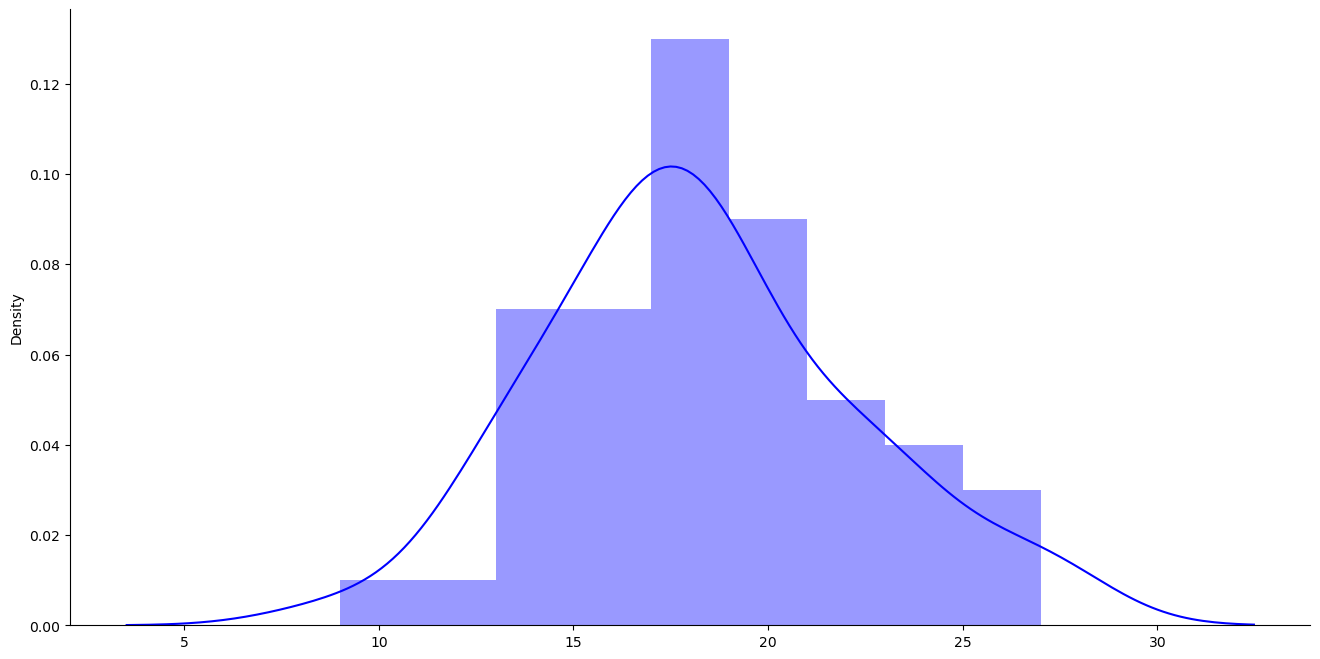

In [11]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [12]:
print(f"A song is listened for an average of {np.mean(song_user)} users, with minimum {np.min(song_user)} and maximum {np.max(song_user)} users")

A song is listened for an average of 18.24 users, with minimum 9 and maximum 27 users


In [13]:
# Get how many songs each user have listened to
user_counts = df_songs.groupby('user_id')['song_id'].count()

# Filter users which have listen to at least 16 songs
user_ten_id = user_counts[user_counts > 16].index.to_list()

In [14]:
# Get how many user have listened to each song
song_counts = df_songs.groupby('song_id')['user_id'].count()

# Get songs which have been listened at least 4 times
song_ten_id = song_counts[song_counts > 200].index.to_list()

In [15]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_reduced = df_songs[(df_songs['user_id'].isin(user_ten_id)) & (df_songs['song_id'].isin(song_ten_id))].reset_index(drop=True)

In [16]:
df_song_reduced.shape

(0, 5)

In [17]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]

In [18]:
df_song_reduced['listen_count'] = pd.cut(df_song_reduced['listen_count'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [21]:
listen_counts = pd.DataFrame(
    df_song_reduced.groupby('listen_count', observed=False).size(),
    columns=['count']
).reset_index(drop=False)


<Axes: xlabel='listen_count', ylabel='count'>

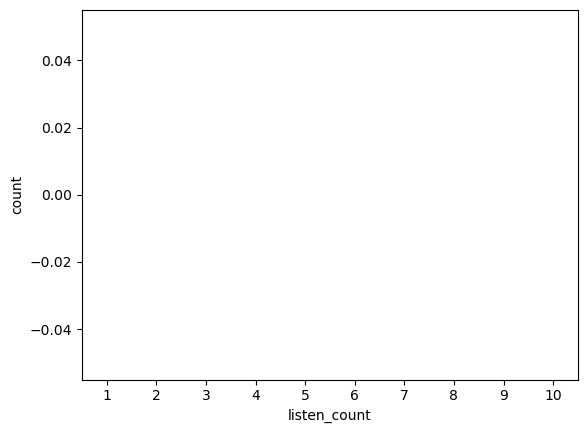

In [23]:
sns.barplot(x='listen_count', y='count', data=listen_counts, hue='listen_count', palette='Set3', legend=False)


In [24]:
print(listen_counts.head())


  listen_count  count
0            1      0
1            2      0
2            3      0
3            4      0
4            5      0


In [25]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_song_reduced[['user_id', 'song_id', 'listen_count']], reader)

In [29]:
from surprise import Dataset, Reader
import pandas as pd

# Example: your own DataFrame (replace this with your actual one)
# It must have 3 columns: user_id, song_id, listen_count
df = df_songs[['user_id', 'song_id', 'listen_count']]

# Check if there’s any data
print(df.shape)
print(df.head())

# Define the format for Surprise
reader = Reader(rating_scale=(df['listen_count'].min(), df['listen_count'].max()))

# Load dataset
data = Dataset.load_from_df(df, reader)

# Now split it
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25)


(912, 3)
  user_id  song_id  listen_count
0  user_1  song_23            17
1  user_1  song_26             4
2  user_1  song_46            16
3  user_1  song_30             3
4  user_1  song_43            20


In [31]:

print(df_songs.shape)
print(df_songs[['user_id', 'song_id', 'listen_count']].dropna().shape)


(912, 5)
(912, 3)


In [33]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Assuming 'df' is your user-song-rating dataframe:
df = df_songs[['user_id', 'song_id', 'listen_count']]

# Define the rating scale based on your data
reader = Reader(rating_scale=(df['listen_count'].min(), df['listen_count'].max()))

# Load data into Surprise format
data = Dataset.load_from_df(df, reader)

# Now split into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

print(f"Trainset has {trainset.n_ratings} ratings")
print(f"Testset has {len(testset)} ratings")


Trainset has 684 ratings
Testset has 228 ratings


In [34]:
param_grid = {'n_factors': [160], 
              'n_epochs': [100], 
              'lr_all': [0.001, 0.005],
              'reg_all': [0.08, 0.1]}

In [35]:
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2)

In [36]:
# find the best parameters for the model
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']
print(grid_search_svd.best_score['rmse'])
print(grid_search_svd.best_params['rmse'])

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.


5.91715202483165
{'n_factors': 160, 'n_epochs': 100, 'lr_all': 0.001, 'reg_all': 0.1}


[Parallel(n_jobs=-2)]: Done   3 out of  12 | elapsed:    1.1s remaining:    3.6s
[Parallel(n_jobs=-2)]: Done   7 out of  12 | elapsed:    1.1s remaining:    0.8s
[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed:    1.2s finished


In [37]:
# Perform the cross validation
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    5.9211  5.7784  5.6824  6.1575  6.0835  5.9246  0.1786  
Fit time          0.01    0.07    0.06    0.05    0.06    0.05    0.02    
Test time         0.00    0.00    0.00    0.01    0.00    0.00    0.00    


{'test_rmse': array([5.9211291 , 5.7784247 , 5.68236176, 6.15745084, 6.08346373]),
 'fit_time': (0.014991044998168945,
  0.07218170166015625,
  0.06263422966003418,
  0.04694676399230957,
  0.05898714065551758),
 'test_time': (0.0, 0.0, 0.0021924972534179688, 0.008261919021606445, 0.0)}

In [38]:
final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 6.0477
The RMSE is 6.047653804216337
